# Pandas Review

Pandas is a Python package for organizing and analyzing data. In one sense, it is a generalization of NumPy, on which it is based.

NumPy is fantastic for working with numerical data that are "well behaved". For example, if you are analyzing data from a tightly controlled laboratory experiment, then NumPy might be perfect.

In the broader world of behavioral data science, however, data can be complicated. Variables can be of multiple types, values can be missing, etc. Pandas was developed to make it easier for us to work with data sets in general, not just numerical arrays.

## Pandas Data

The main data object in pandas is the `DataFrame`. It is a table of data in which each column has a name, generally corresponding to a specific real-world variable. 

Just as we can think about a NumPy array as a spatial layout of a Python list of lists, we can think of a pandas `DataFrame` as a spatial layout of a Python dictionary.

Consider the following Python dictionary:

In [6]:
dis_chars = {'name': ['Mickey', 'Minnie', 'Pluto'],
             'gender': ['m', 'f', 'n'],
             'age': [95, 95, 93],}

In [7]:
dis_chars

{'name': ['Mickey', 'Minnie', 'Pluto'],
 'gender': ['m', 'f', 'n'],
 'age': [95, 95, 93]}

On the one hand, this is a nice organized *container* of data. But on the other hand, it is not much else. If we wanted to compute anything, like the mean age of all non-male characters, we'd have to start writing code from scratch.

Let's make our dictionary into a `DataFrame`. First, we'll import pandas.

In [4]:
import pandas as pd

Importing pandas as `pd` is conventional, like importing numpy as `np`, so there's no reason to do anything else.

Now we can convert our data to a `DataFrame` using `pd.DataFrame()`.

In [ ]:
dis_df = pd.DataFrame(dis_chars)

And let's look at our new creation!

In [5]:
dis_df

,name,gender,age
0,Mickey,m,95
1,Minnie,f,95
2,Pluto,n,93


Now we have a nice organized table of data, in which each column corresponds to a variable, and can be referred to by name. Further, it makes it relatively easy for us to do lots of analyses "out of the box". For example:

In [27]:
dis_df['age'].mean()

94.33333333333333

Here, we just grabbed a column of data by name (`dis_df['age']`), and then computed its mean with the built-in `mean()` method.

The `DataFrame` is the main type of object we work with in pandas. If you have experience in R, then you'll be in familiar territory, because the `DataFrame` in Python is modeled after the data frame (or tibble) in R.

In [28]:
type(dis_df)

pandas.core.frame.DataFrame

Each column of a `DataFrame` is a pandas `Series`.

In [29]:
dis_age_s = dis_df['age']
dis_age_s

0    95
1    95
2    93
Name: age, dtype: int64

In [30]:
type(dis_age_s)

pandas.core.series.Series

And each series is a collection of more fundamental objects. So if we look at the last age in our series...

In [32]:
a = dis_age_s[2]
a

93

And check the type...

In [33]:
type(a)

numpy.int64

We see that it is a numpy integer; a hint that pandas is indeed built from NumPy!

If we check the type of one of the other values:

In [34]:
type(dis_df['gender'][2])

str

We see that it is a Python string object. (Take a moment to dissect that line of code, and see how it is doing exactly the same thing as we did to get the type of an age value.)

---

In the code cell below...

---

## Data i/o

One of the really great things about pandas is that it makes reading, inspecting, and writing data files in common formats relatively easy. 

### Importing (input)

Following the pandas documentation, let's look at some data about the passengers on the RMS Titanic. This is as easy as calling `pd.read_csv()`:

In [37]:
In [2]: titanic = pd.read_csv("data/titanic.csv")

There are lots of other formats that pandas can read, including excel and html. It can even read data from the clipboard!

### Inspecting

The first thing we need to do is just peek at our imported data to make sure nothing looks funny.

In [38]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


A nice thing about pandas `DataFrames` is that, by default, they show you their first and last 5 rows (their head and tail), and then tell you how big they are (891x12 in this case).

We can look at as much of the head or tail as we want with the `head()` and `tail()` methods.

In [42]:
titanic.tail(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


---

Use the cell below to display the first 11 rows of the titanic data.

---

We can also look at the data types:

In [45]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

(the columns listed as "object" seem to be strings)

We can also get more detailed information using the `info()` method:

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This gives us a nice summary of the types of data in the columns and, in particular, how many valid (non-missing) values are in each. We can see that "Cabin", for example, has many missing values.

### Exporting (output)

The `to_` methods, such as `to_csv()`, `to_excel()`, etc., allow us to export data in many ways. As an example, let's export the titanic data as a Microsoft Excel file.

---

In the cell below, use `titanic.to_excel(...)` to export the data to an Excel spreadsheet.

Open the file in Excel to verify that the export worked.

---

## Selecting Data

In numpy, we select data by primarily by row and column indexes. In pandas, we generally address columns (corresponding to real world variables) by name and rows by one or more criteria.

### Getting columns

For example, we can compute the mean age of the passengers by grabbing that column of data by name, and then computing the mean of it.

In [51]:
ages = titanic['Age']
ages.mean()

29.69911764705882

---

In the cell below, compute the mean age in one line of code.

---

We can get multiple columns by indexing our `DataFrame` with a Python list of column names. We can do this in two lines for readability.

In [62]:
wanted_cols = ['Fare', 'Survived']
fare_surv = titanic[wanted_cols]

In [63]:
fare_surv

,Fare,Survived
0,7.2500,0
1,71.2833,1
2,7.9250,1
3,53.1000,1
4,8.0500,0
...,...,...
886,13.0000,0
887,30.0000,1
888,23.4500,0
889,30.0000,1


But more commonly we do it in a single line.

In [61]:
fare_surv = titanic[['Fare', 'Survived']]

Your initial reaction might be "Why the double brackets? Why not single brackets?", and the reason should be clear from the two line example: the `DataFrame` expects a Python list, not separate strings.

### Getting rows

We generally extract rows of interest by placing one or more criterea on a particular column. 

In [64]:
my_critereon = fare_surv['Fare'] > 20
rich = fare_surv[my_critereon]

What is actually happening here is that the logical test `fare_surv['Fare'] > 20` is creating a pandas series that is `True` for the rows in which the fare paid was greater than 20 pounds sterling, and `False` otherwise. 

Let's look at `my_critereon`:

In [67]:
my_critereon

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888     True
889     True
890    False
Name: Fare, Length: 891, dtype: bool

This series is then used to get all the rows of `fare_surv` that correspond to the `True` values, and these are placed in `rich`.

This is known as ***logical indexing***, and is widely used in data analysis!

As with fetching columns, we can do this one line instead of two.

In [68]:
rich = fare_surv[fare_surv['Fare'] > 20]

---

In the cell below, get the passenger class (`Pclass`) and survival status of passengers that paid more than 20 pounds for their voyage.

Now fetch the same for passengers that paid 20 pounds or less for their voyage.

---

## Basic Plotting

`DataFrame` objects know how to plot themselves! Or, more precisely, `DataFrame` objects have methods for plotting. Let's try!

<AxesSubplot:>

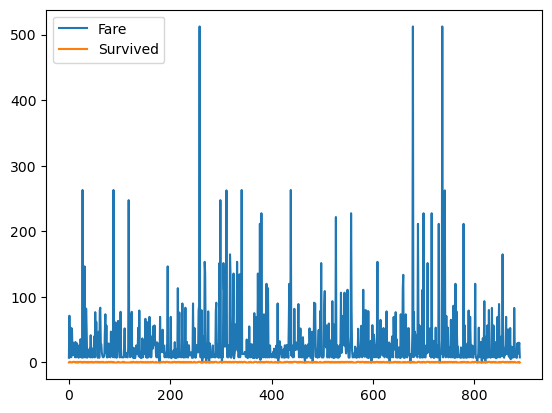

In [71]:
import matplotlib as plt
fare_surv.plot()

As a graph, this one isn't very informative, but it does show us what the default `DataFrame.plot()` method does: it plots (numerical) data by row index. This could be quite useful if a data frame were sorted on a particular variable...

Other type of plots are reached through plot, like `fare_surv.plot.scatter()` or similar. We can see what methods are available by hitting the <TAB> key after `DataFrame.plot.`
    
Do this below;

In [ ]:
fare_surv.plot.

So there *is* a `scatter()` available, along with many of our other `matplotlib` friends. 

Let's try a scatter plot Fare vs. Survival.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

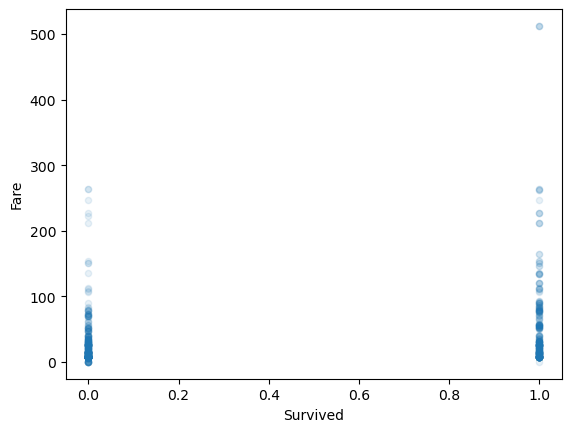

In [80]:
fare_surv.plot.scatter(x="Survived", y="Fare", alpha = 0.1)

---

Use the cell below to make a box plot of the ***column*** `Fare` ***by*** the variable `Survived`.

In [84]:
# boxplot of Fare paid by Survival status


---

I guess those 500 lb. fares were worth it.

## Calculating New Columns

## Summary Statistics

In [ ]:
titanic.describe()